# Perceptron

In [1]:
# imports
%cd ..
import numpy as np
from algorithms.linear_model.Perceptron import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

e:\KTorch


C:\Users\Karim\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# create dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

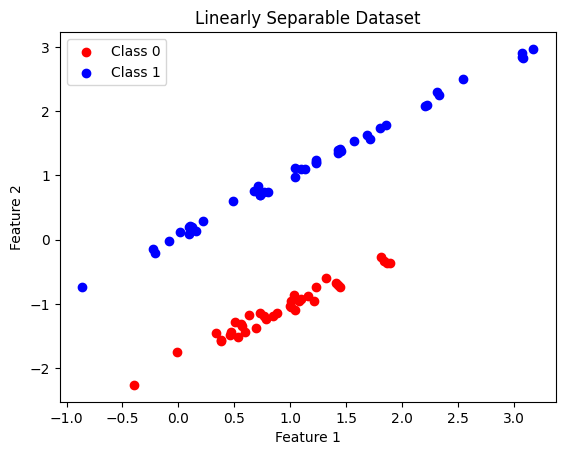

In [3]:
# Plot dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linearly Separable Dataset')
plt.show()

In [4]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [5]:
# Train model
model = Perceptron(max_iter=1000, eta0=0.1)
model.fit(X_train, y_train)
print(f'Accuracy: {model.score(X_test, y_test)}')

Perceptron trained for 1000 iterations
Accuracy: 1.0


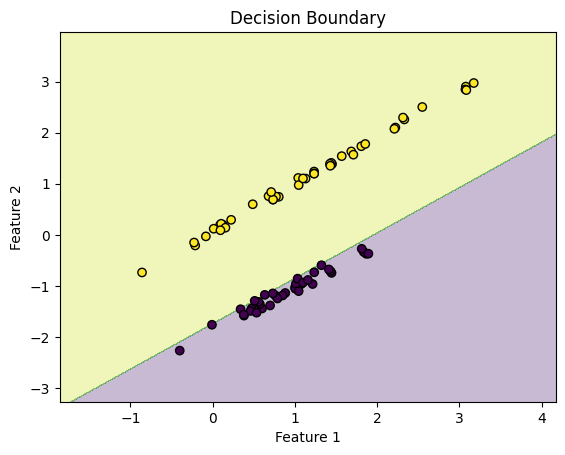

In [6]:
plot_decision_boundary(model, X_train, y_train)

In [7]:
# Test model on bigger dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

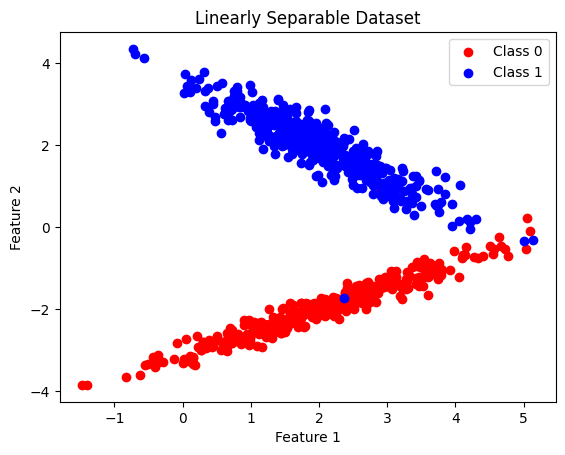

In [8]:
# Plot dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linearly Separable Dataset')
plt.show()

In [9]:
# Train model
model = Perceptron(max_iter=1000, eta0=0.1)
model.fit(X_train, y_train)
print(f'Accuracy: {model.score(X_test, y_test)}')

Perceptron trained for 1000 iterations
Accuracy: 0.985


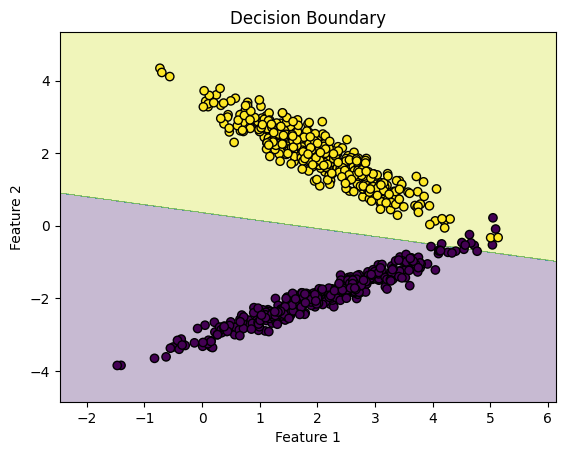

In [10]:
plot_decision_boundary(model, X_train, y_train)

In [11]:
# Train models on all regularization parameters
reg = [None, 'l1', 'l2', 'elasticnet']

for r in reg:
    print(f'Regularization: {r}')
    model = Perceptron(max_iter=1000, eta0=0.1, penalty=r, l1_ratio=0.5)
    model.fit(X_train, y_train)
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Regularization: None
Perceptron trained for 1000 iterations
Accuracy: 0.985
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Regularization: l1
Perceptron trained for 1000 iterations
Accuracy: 0.985
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Regularization: l2
Perceptron trained for 1000 iterations
Accuracy: 0.985
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Regularization: elasticnet
Perceptron trained for 1000 iterations
Accuracy: 0.985
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
